<a href="https://colab.research.google.com/github/zabihin/Block4-NLP_disaster_tweet/blob/main/1_Twitter_EDA_and_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Natural Language Processing with Disaster Tweets
Predict which Tweets are about real disasters and which ones are not

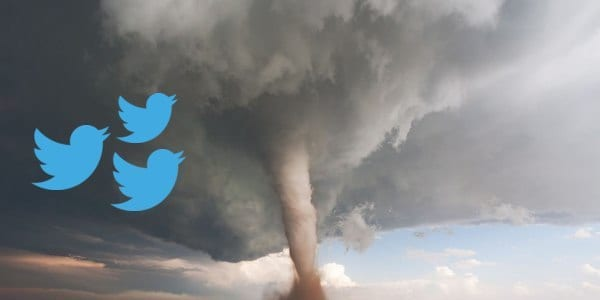

###Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.model_selection import train_test_split

###Load the Data

In [ ]:
#load data
train_tweet = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test_tweet = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
display (train_tweet.head())

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


##EDA (Exploratory data analysis)

In [ ]:
print (train_tweet.shape)

(7613, 5)


In [ ]:
train_tweet.describe(include='all')


,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


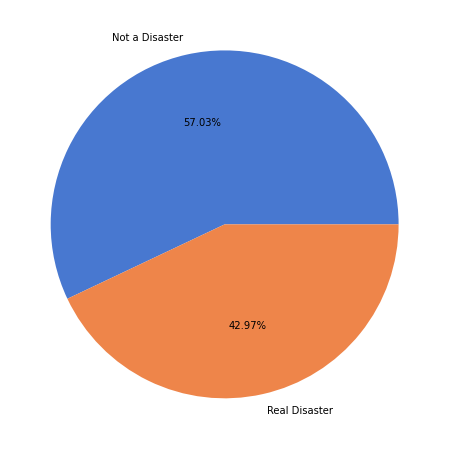

In [ ]:
labels = ["Not a Disaster", "Real Disaster"]
plt.figure(figsize=(12, 8))

#define Seaborn color palette to use
colors = sns.color_palette('muted')[0:2]

#create pie chart
plt.pie(train_tweet.groupby("target").size().sort_values(ascending=False), labels = labels, colors = colors, autopct='%.2f%%')
plt.show()

###Data cleaning

In [ ]:
#remove useless feautures
train_tweet.drop(['id','keyword','location'],axis=1,inplace=True)

In [ ]:
#add two feautures for hashtag and mention
train_tweet['Hashtag'] = train_tweet['text'].apply(lambda x: "#" if '#'in x else 'No-#' )
train_tweet['Mention'] = train_tweet['text'].apply(lambda x: "@" if '@'in x else "No-@")

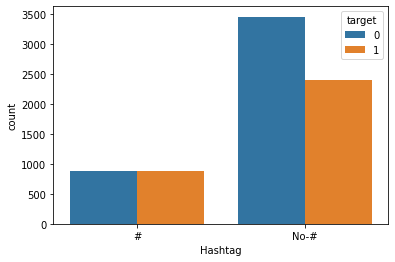

In [ ]:
sns.countplot(x='Hashtag',hue='target',data=train_tweet)

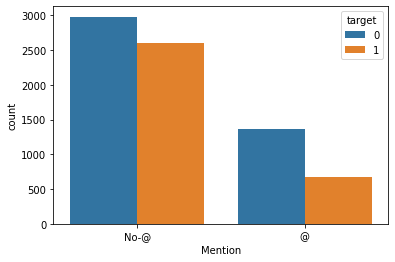

In [ ]:
sns.countplot(x='Mention',hue='target',data=train_tweet)

In [ ]:
#remove useless feautures
train_tweet.drop(['Hashtag','Mention'],axis=1,inplace=True)

find that if the same twitt have differenet target?








In [ ]:
#find if there are same tweets with different targets
train_tweet['index_t'] = train_tweet.index # make list of originals index

aggs = {'target': 'mean',
         'index_t':lambda x: list(x)} # Keep track of the index 
grouped_df = train_tweet[train_tweet['text'].duplicated(keep=False)].groupby('text').agg(aggs) 

# if target mean is not equal to 0 or 1 --> we have same tweets with different targets
dif_targets = grouped_df[(grouped_df.target!=1) & (grouped_df.target!=0)].reset_index()
dif_targets

,text,target,index_t
0,#Allah describes piling up #wealth thinking it...,0.333333,"[4290, 4299, 4312]"
1,#foodscare #offers2go #NestleIndia slips into ...,0.666667,"[4221, 4239, 4244]"
2,.POTUS #StrategicPatience is a strategy for #G...,0.750000,"[2830, 2831, 2832, 2833]"
3,CLEARED:incident with injury:I-495 inner loop...,0.666667,"[4597, 4605, 4618]"
4,Caution: breathing may be hazardous to your he...,0.500000,"[4232, 4235]"
5,He came to a land which was engulfed in tribal...,0.333333,"[3240, 3243, 3248, 3251, 3261, 3266]"
6,Hellfire is surrounded by desires so be carefu...,0.333333,"[4285, 4305, 4313]"
7,Hellfire! We donÛªt even want to think about ...,0.500000,"[4306, 4320]"
8,I Pledge Allegiance To The P.O.P.E. And The Bu...,0.500000,"[1214, 1365]"
9,In #islam saving a person is equal in reward t...,0.500000,"[6614, 6616]"


so if the mean of target for same tweets is greater than 0.5 I change all of targets to 1, if the mean is less than 0.5 I change it to 0 and  i remove the tweets if the mean =0.5
then I remove repeated tweets and  do re index

In [ ]:
for ind in range(len(dif_targets.index)):
  if dif_targets.target[ind]>0.5:
    for l in dif_targets.index_t[ind]:
      train_tweet.target[l]=1
  elif dif_targets.target[ind]<0.5: 
    for l in dif_targets.index_t[ind]:
      train_tweet.target[l]=0
  else:
    train_tweet.drop(dif_targets.index_t[ind],inplace=True)
 

train_tweet.drop_duplicates(keep='first',inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
train_tweet.shape

(7589, 5)

#clean text

In [ ]:
# Function to clean the text
def clean_text(text):
    # remove punctuation
    text = ''.join([c for c in text if c not in r"[!\"#@$%&()'‰ûª*+,-./:;<=>?[\\\]^_`{|}~]+"]) 
    # remove stopwords
    text = ' '.join([c for c in text.split() if c not in STOP_WORDS])
    # remove numbers
    text = ''.join([c for c in text if not c.isdigit()])
    # lowercase
    text = ' '.join(text.split()).lower()
    # lemmatize
    text = ' '.join([c.lemma_ for c in nlp(text)])
    # remove words starting by http
    text = ' '.join([c for c in text.split() if not c.startswith("http")])
    
    return text

In [ ]:
train_tweet["text_clean"] = train_tweet["text"].apply(clean_text)


##Tokenization and Padding cleaned text

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Creation of a tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)

# Training the tokenizer on the training set
tokenizer.fit_on_texts(train_tweet['text_clean'])

# Transform the text into sequences of integers
train_tweet["text_encoded"] = tokenizer.texts_to_sequences(train_tweet["text_clean"])

train_tweet.head()

,text,target,index_t,text_clean,text_encoded
0,Our Deeds are the Reason of this #earthquake M...,1,0,our deed reason earthquake may allah forgive,"[560, 3713, 459, 216, 863, 1342, 1789]"
1,Forest fire near La Ronge Sask. Canada,1,1,forest fire near la ronge sask canada,"[157, 6, 201, 561, 5495, 5496, 1101]"
2,All residents asked to 'shelter in place' are ...,1,2,all resident ask shelter place notify officer ...,"[116, 1607, 507, 1790, 386, 5497, 354, 139, 22..."
3,"13,000 people receive #wildfires evacuation or...",1,3,people receive wildfire evacuation order calif...,"[15, 2378, 104, 220, 341, 51]"
4,Just got sent this photo from Ruby #Alaska as ...,1,4,just got send photo ruby alaska smoke wildfire...,"[202, 316, 221, 161, 5498, 1791, 247, 104, 237..."


In [ ]:
text_pad = tf.keras.preprocessing.sequence.pad_sequences(train_tweet["text_encoded"], padding="post")


In [ ]:
train_tweet.reset_index(drop=True, inplace=True)
train_tweet.drop(['index_t'],axis=1,inplace=True)
train_tweet.tail()

,text,target,text_clean,text_encoded
7584,Two giant cranes holding a bridge collapse int...,1,two giant crane hold bridge collapse nearby home,"[289, 696, 1015, 382, 303, 55, 553, 39]"
7585,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary thetawniest the control wild fire c...,"[5471, 5472, 2, 605, 270, 6, 51, 170, 232, 173..."
7586,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,m utckm s volcano hawaii,"[7, 3472, 11, 469, 1331]"
7587,Police investigating after an e-bike collided ...,1,police investigate ebike collided car little p...,"[34, 801, 2631, 2632, 58, 254, 4324, 2631, 161..."
7588,The Latest: More Homes Razed by Northern Calif...,1,the late more home raze northern california wi...,"[2, 144, 111, 39, 425, 170, 51, 104, 525, 17]"


In [ ]:
#preprosses test
test_tweet["text_clean"] = test_tweet["text"].apply(clean_text)
# Creation of a tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)

# Training the tokenizer on the training set
tokenizer.fit_on_texts(test_tweet['text_clean'])

# Transform the text into sequences of integers
test_tweet["text_encoded"] = tokenizer.texts_to_sequences(test_tweet["text_clean"])
text_pad_test = tf.keras.preprocessing.sequence.pad_sequences(test_tweet["text_encoded"], padding="post")

In [ ]:
X= text_pad
Y= train_tweet.target


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.20, random_state = 0)


In [ ]:
X_val

array([[ 680,  680,  680, ...,    0,    0,    0],
       [ 313,   15,  276, ...,    0,    0,    0],
       [ 114,  180,  473, ...,    0,    0,    0],
       ...,
       [   8,    3,  127, ...,    0,    0,    0],
       [ 205,  111, 3505, ...,    0,    0,    0],
       [ 460,  401,  139, ...,    0,    0,    0]], dtype=int32)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)

y_pred = model.predict(X_val)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_val, y_pred)
print(confusion_m)

from sklearn.metrics import accuracy_score, precision_score, recall_score
acc = accuracy_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)


[[821  40]
 [610  47]]


In [ ]:
acc

0.5718050065876152

In [ ]:
rec

0.0715372907153729

In [ ]:
prec

0.5402298850574713

In [ ]:
2* rec*prec/(rec+prec)

0.12634408602150535